In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

Se tiene una muetra cuya edad se quiere determinar. Para eso, se mide la concentración de $^{14}C$ radiactivo presente en la muestra, $\frac{^{14}C}{^{12}C}$,  ("a tiempo $t$") y la cantidad STD ("a tiempo 0"). Se define $$R_{14}=\frac{^{14}C(t)}{^{14}C(0)} = \frac{\frac{^{14}C(t)}{^{12}C}}{\frac{^{14}C(0)}{^{12}C}} = \frac{R(t)}{R_0}$$ donde $^{14}C$ fueron medidos con un detector, y por lo tanto tienen distribución poissoniana, y $^{12}C$ se determinan a partir de la corriente (que suponemos constante en el tiempo), y se consideran magnitudes sin error (por ahora). 

Duda: ¿cómo se mide el $^{12}C$?

Por lo tanto, la distribución de $R_{14}$ es el cociente de dos poissonianas. Simulamos este experimento.

In [41]:
num_muestras = int(1e6)
mu1, mu0 = 10, 15
ct = poisson.rvs(mu1, size=num_muestras)
c0 = poisson.rvs(mu0, size=num_muestras)
    
R = np.array(ct, dtype=float)/np.array(c0,dtype=float)

In [42]:
#Elimino los infinitos
mask = (R != np.float('+inf'))
R = R[mask]

# Verifico que para todos los elementos sea cierto que no son +inf
np.all(R != np.float('+inf'))

True

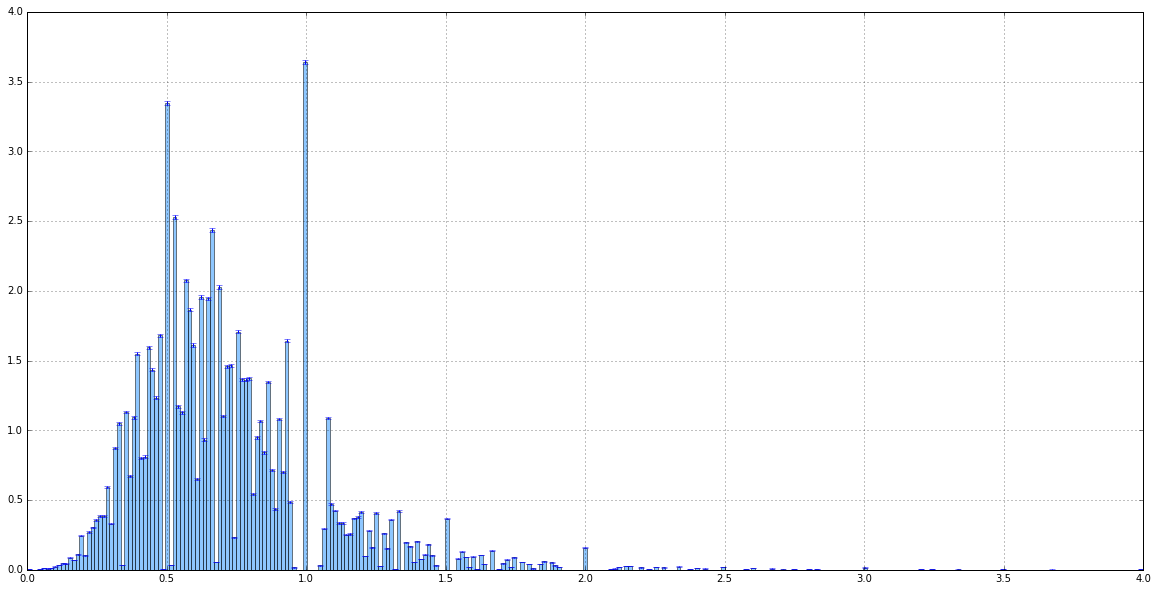

In [43]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 1, 1)

bines = np.linspace(0,4,300)
numero, bins = np.histogram(R, bins = bines)
error = (np.sqrt(numero) / (np.diff(bins) * np.sum(numero)))
numero = numero / (np.diff(bins) * np.sum(numero)) #normalizo el area
ax1.bar(bins[:-1], numero, width = np.diff(bins),  yerr=error, ecolor="b", color='dodgerblue', alpha=0.5)
#ax1.set_xlabel('k')
#ax1.set_ylabel('P(k)')
ax1.grid()

In [53]:
def esp(b,n):
    return np.sum(np.diff(b)*n*b[:-1])

#esperanza = esp(bines, numero)

def lado_izq(hasta, bines, numero, bins):
    cerca = np.argmax([x for x in bines if x < hasta])
    return np.sum(np.diff(bins[:cerca]) * (numero[:cerca-1]))

def lado_der(desde, bines, numero, bins):
    cerca = np.argmax([x for x in bines if x >= desde])
    return np.sum(np.diff(bins[cerca:]) * (numero[cerca:]))



Supongamos que se mide $R_{medido}$. La variable $R_{14}$ esta descripta por la función $$R_{14}=e^{-\frac{ln(2)}{T_{1/2}}t}$$ donde $\tau=\frac{T_{1/2}}{ln(2)}$ es la vida media, $T_{1/2}=5730$ años, y $t$ es la edad que queremos determinar. 

$P(a \leq t \leq b) = 0.68$

$P(a \leq -\frac{T_{1/2}}{ln(2)}ln(R_{14})\leq b) = 0.68$

$P(\exp(\frac{ln(2)}{T_{1/2}}a) \leq R_{14} \leq \exp(\frac{ln(2)}{T_{1/2}}b)) = 0.68$

$P(a' \leq R_{14} \leq b')=0.68)$

Para eso, "movemos" la distribución cambiando el $\mu$ de $^{14}C(t)$, y buscamos que la integral entre 0 y $R_{medido}$ sea 0.16 si movemos la distrtibución para la izquierda, y que la integral entre $R_{medido}$  e infinito sea 0.16 si movemos la distrtibución para la derecha. Para mover la distribución movemos el $\mu_1$ del conteo de $^{14}C(t)$. Si $\mu_1$ es más chico, la distribución de $R_{14}$ se mueve para la izquierda $\Rightarrow$ Calculamos la integral del lado derecho.

Obs.: La distribución de $R_{14}$ queda muy rara para algunos valores de $\mu$, y además habría que ir cambiando el valor máximo del vector `bines`.

In [55]:
R_medido = 2 #Supongamos que se mide esto

Seguro hay una forma muchisimo mas eficiente de hacer esto:

In [56]:
mu_chicos = np.arange(0,50,1)
for mu in mu_chicos:
    ct = poisson.rvs(mu, size=num_muestras) #simulamos
    c0 = poisson.rvs(mu0, size=num_muestras)    
    R = np.array(ct, dtype=float)/np.array(c0,dtype=float)
    mask = (R != np.float('+inf'))
    R = R[mask]
    bines = np.linspace(0,4,300)
    numero, bins = np.histogram(R, bins = bines)
    numero = numero / (np.diff(bins) * np.sum(numero)) #normalizo el area
    #esperanza = esp(bines, numero)
    lado01 = lado_der(R_medido, bines, numero, bins)
    print(mu, lado01)

(0, 0.0)


C:\Users\Mario\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in divide


(1, 2.0000020000019998e-06)
(2, 1.0000000000000003e-05)
(3, 3.7000074000148001e-05)
(4, 0.000119000119000119)
(5, 0.00026500212001696015)
(6, 0.00060300542704884344)
(7, 0.0012050241004820097)
(8, 0.0021020861855336071)
(9, 0.0037511425434166501)
(10, 0.0061935326438073684)
(11, 0.0096742189515878988)
(12, 0.014377889955881133)
(13, 0.021400955310475905)
(14, 0.030205659384522431)
(15, 0.041103963610785089)
(16, 0.055034063511158839)
(17, 0.071111983252220873)
(18, 0.090906450465969929)
(19, 0.11378701835924232)
(20, 0.14077666982206746)
(21, 0.16931126650721115)
(22, 0.20074899143320957)
(23, 0.23602546950600023)
(24, 0.27340119852179628)
(25, 0.31130832753763332)
(26, 0.35172610487095934)
(27, 0.39154887855710291)
(28, 0.43346475043302513)
(29, 0.47464764128825832)
(30, 0.5160932957764971)
(31, 0.55585110220234357)
(32, 0.5953698193257011)
(33, 0.63263783606687385)
(34, 0.66763866764811819)
(35, 0.7009359158226548)
(36, 0.73232002137037533)
(37, 0.76192711233108468)
(38, 0.7880950094

$\mu_{min}\approx 21 \rightarrow$ Correspondiente al conteo de $^{14}C(t)$ 

In [57]:
mu_grandes = np.arange(mu1,100,1)
for mu in mu_grandes:
    ct = poisson.rvs(mu, size=num_muestras) #simulamos
    c0 = poisson.rvs(mu0, size=num_muestras)    
    R = np.array(ct, dtype=float)/np.array(c0,dtype=float)
    mask = (R != np.float('+inf'))
    R = R[mask]
    bines = np.linspace(0,4,300)
    numero, bins = np.histogram(R, bins = bines)
    numero = numero / (np.diff(bins) * np.sum(numero)) #normalizo el area
    #esperanza = esp(bines, numero)
    lado01 = lado_izq(R_medido, bines, numero, bins)
    print(mu, lado01)

(10, 0.99386854627242416)
(11, 0.99031971252176532)
(12, 0.98535899859471177)
(13, 0.97879318933387727)
(14, 0.96990435983112899)
(15, 0.95880048628934222)
(16, 0.94497106031444811)
(17, 0.9283770633604842)
(18, 0.90862051350880324)
(19, 0.88549778972802284)
(20, 0.85877639436986986)
(21, 0.83042358974873665)
(22, 0.7981715440897208)
(23, 0.76374703010233946)


C:\Users\Mario\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in divide


(24, 0.72792762657440313)
(25, 0.68802938189395302)
(26, 0.64825881669747287)
(27, 0.607783796287372)
(28, 0.56652626009808105)
(29, 0.52445182561374692)
(30, 0.48422752722574292)
(31, 0.44383558254889105)
(32, 0.40458766743141611)
(33, 0.36765363880136553)
(34, 0.33219962510927303)
(35, 0.29905220798475063)
(36, 0.26738290203554321)
(37, 0.23823932786902949)
(38, 0.21187510570622672)
(39, 0.18657956418582106)
(40, 0.16431183817676828)
(41, 0.14378687206783322)
(42, 0.12542230947484251)
(43, 0.10928661689493376)
(44, 0.094475178415785011)
(45, 0.081428065504903099)
(46, 0.070027323969622315)
(47, 0.060131129299410196)
(48, 0.051864558804109215)
(49, 0.043854181220243545)
(50, 0.037102853471783735)
(51, 0.031396616947073054)
(52, 0.026451199119074325)
(53, 0.022658184923004261)
(54, 0.019040475525441178)
(55, 0.016050934315387462)
(56, 0.013282142446753142)
(57, 0.01118485807073041)
(58, 0.0093411554826172086)
(59, 0.0075679840706141741)
(60, 0.0064298193126717269)
(61, 0.00541167780897

$\mu_{max} \approx 40$

Ahora faltaría traducir estos valores de $\mu$ correspondientes al conteo de $^{14}C(t)$ en valores máx y mín de $R_{14}$, y después mulitplicar por $1/\tau$ y tomar logaritmo, para obtener $a$ y $b$.